Simple example:

Assume that we have the price of gold per gram and we estimate the price of oil using a linear function $ f(x) = ax + b $. We have 20 samples.


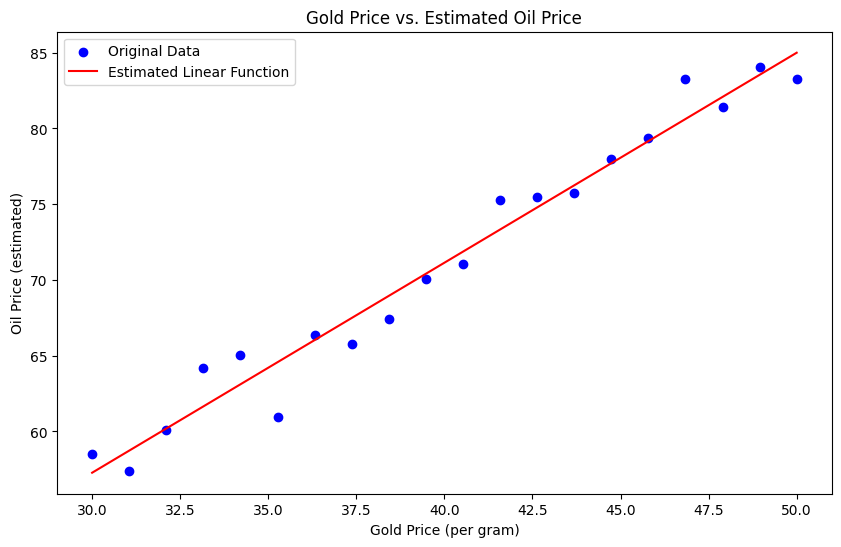

Estimated parameters: a = 1.39, b = 15.69


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate synthetic data
np.random.seed(0)  # For reproducibility
gold_price = np.linspace(30, 50, 20)  # Gold prices in some unit
true_a = 1.5  # True slope
true_b = 10  # True intercept
noise = np.random.normal(0, 2, gold_price.shape)  # Random noise
oil_price = true_a * gold_price + true_b + noise  # Linear relationship with noise

# Step 2: Estimate the parameters using linear regression
A = np.vstack([gold_price, np.ones_like(gold_price)]).T
estimated_a, estimated_b = np.linalg.lstsq(A, oil_price, rcond=None)[0]

# Step 3: Visualize the original data and the estimated linear function
plt.figure(figsize=(10, 6))
plt.scatter(gold_price, oil_price, color='blue', label='Original Data')
plt.plot(gold_price, estimated_a * gold_price + estimated_b, color='red', label='Estimated Linear Function')
plt.xlabel('Gold Price (per gram)')
plt.ylabel('Oil Price (estimated)')
plt.title('Gold Price vs. Estimated Oil Price')
plt.legend()
plt.show()

print(f"Estimated parameters: a = {estimated_a:.2f}, b = {estimated_b:.2f}")


In the case of the MNIST dataset, each image is represented as a vector of 784 elements (28x28 pixels). When applying linear regression or other techniques to such high-dimensional data, you need to handle it differently compared to simpler cases with one-dimensional input. 

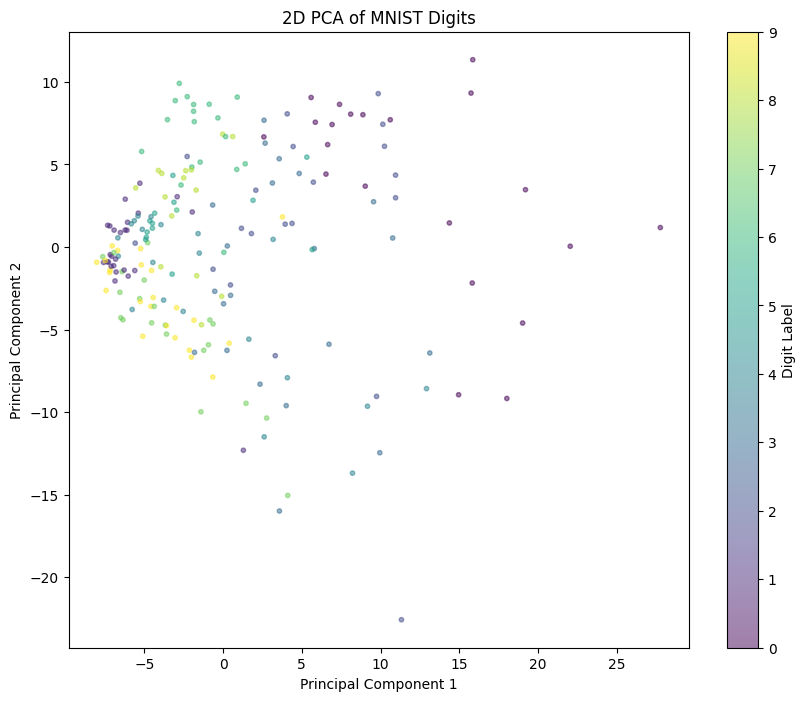

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load MNIST dataset
mnist = fetch_openml('mnist_784')
X = mnist.data
y = mnist.target.astype(float)

# For demonstration, use a smaller subset of the data
X_subset = X[:200]  # Take first 2000 samples for quicker plotting
y_subset = y[:200]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_subset)

# Apply PCA to reduce dimensions from 784 to 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the 2D PCA result
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_subset, cmap='viridis', alpha=0.5, s=10)
plt.colorbar(label='Digit Label')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA of MNIST Digits')
plt.show()
